In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getDf():
    files = {}
    for size in [2000000, 4000000, 6000000, 8000000]:
        with open("../result/resultTreeAggregate_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        dfs[k] = df
    data = dfs['size2000000']
    for s in [4000000, 6000000, 8000000]:
        data = pd.concat([data, dfs["size{}".format(s)]])
    data = data.astype({"datastructure": str, "size": int, "partnumber": int, "method": str, "aggtime":int, "accesstime": int})
    return data

In [3]:
df = getDf()

In [4]:
df_avg = df.groupby(["size", "partnumber","method"]).mean().reset_index()

In [5]:
df_avg

,size,partnumber,method,aggtime,accesstime
0,2000000,8,"""copy""",19182813.2,22615.4
1,2000000,8,"""shared""",12777755.6,23688.4
2,2000000,16,"""copy""",23025224.2,22711.0
3,2000000,16,"""shared""",17117941.2,23630.4
4,2000000,32,"""copy""",24165011.4,22548.4
5,2000000,32,"""shared""",21356707.0,23864.4
6,2000000,64,"""copy""",28492799.6,22735.8
7,2000000,64,"""shared""",20318213.6,24370.4
8,4000000,8,"""copy""",38105575.6,41378.6
9,4000000,8,"""shared""",25912168.2,46816.8


In [14]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, round(height, 3)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 15, fontweight='bold')

In [15]:
df_avg[(df_avg["method"] == '"copy"') & (df_avg["partnumber"] == 7)]

,size,partnumber,method,aggtime,accesstime


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


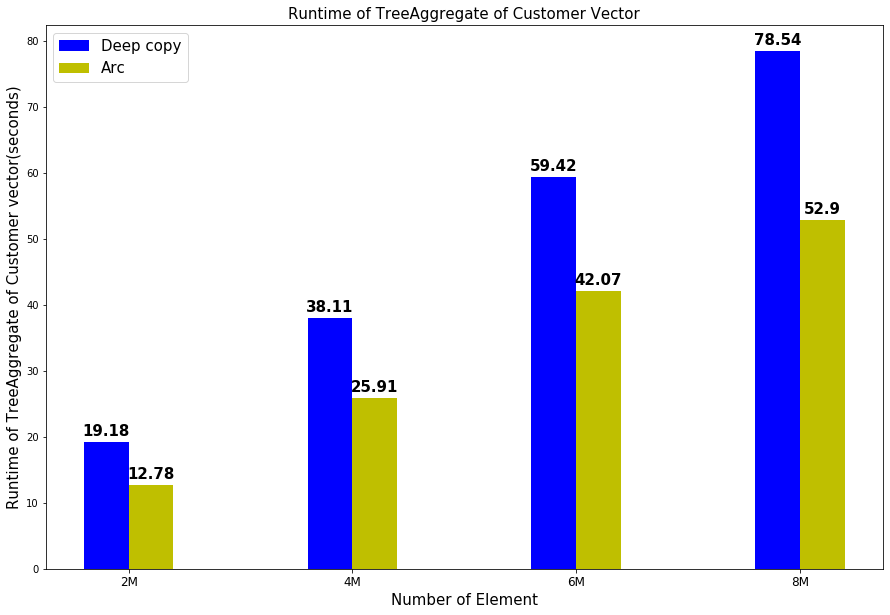

In [17]:
copy = df_avg[(df_avg["method"] == '"copy"') & (df_avg["partnumber"] == 8)]
shared = df_avg[(df_avg["method"] == '"shared"') & (df_avg["partnumber"] == 8)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w / 2, round(copy["aggtime"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(shared["aggtime"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "M" for n in (label / 1000000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Runtime of TreeAggregate of Customer vector(seconds)", fontsize = 15)
ax.set_title("Runtime of TreeAggregate of Customer Vector", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"), fontsize=15)
##ax.set_yscale('log')
fig.savefig("rust_tree_aggregate.eps")
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

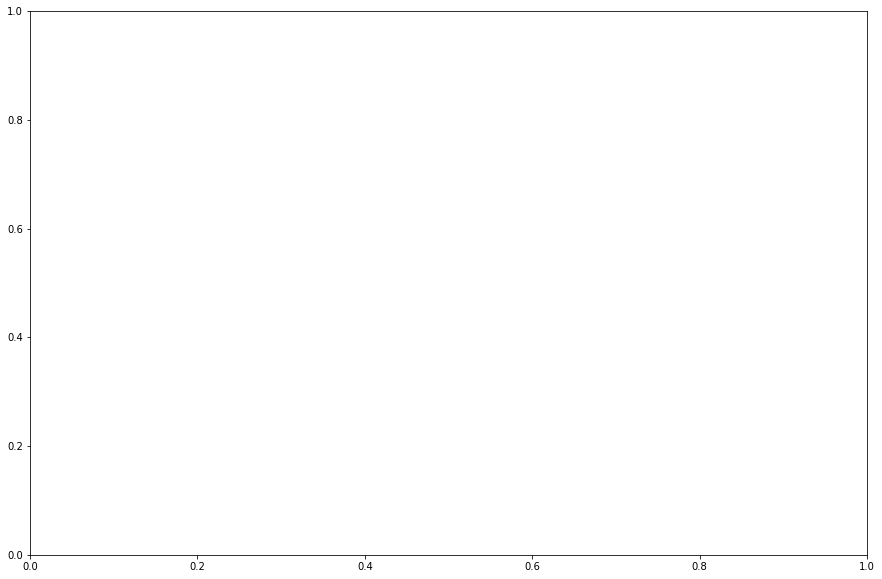

In [13]:
copy = df_avg[(df_avg["method"] == '"copy"') & (df_avg["size"] == 3000000)]
shared = df_avg[(df_avg["method"] == '"shared"') & (df_avg["size"] == 3000000)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['partnumber'].nunique())
b1 = ax.bar(idx - w / 2, round(copy["aggtime"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(shared["aggtime"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(df_avg['partnumber'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Object", fontsize = 15)
ax.set_ylabel("Runtime of sortting elements of Customer vector(seconds)", fontsize = 15)
ax.set_title("Runtime of Sortting Elements of Customer Vector", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_merge_sort.eps")
plt.show()

In [12]:
copy_v = copy["aggtime"].values
share_v = shared["aggtime"].values

In [16]:
(((copy_v - share_v) / share_v) * 100)

array([50.12662474, 47.05668513, 41.25895865, 48.47900876])

In [14]:
(copy_v / share_v)


array([1.50126625, 1.47056685, 1.41258959, 1.48479009])